In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.utils import make_grid
from tqdm import tqdm
import time
import os
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from vae_2 import VAE
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torchsummary import summary
from plotting_utils import plot_images_from_models, plot_generated_images, plot_model_reconstructions
alphas = [0.02, 0.04,0.06,0.08,0.10]
alpha = 0.04
beta = 1-alpha
latent_dim = 256  # Add more latent dimensions if you have multiple models
loss_reduction = 'sum'
device = torch.device("cuda")
model = torch.load(f'models/sum_male_young_bald/combined_model_{loss_reduction}-loss_{latent_dim}-latent_{alpha}_{beta}.pth')

In [26]:
#alphas = [0.1, 0.2, 0.3, 0.4,0.5,0.6,0.7,0.8, 0.9]
img1 = '000008'
img2 = '000024'
# Load the image
image1 = Image.open(f'/Users/Nate/Documents/cs583/midterm/data/img_align_celeba/img_align_celeba/img_align_celeba/{img1}.jpg')
image2 = Image.open(f'/Users/Nate/Documents/cs583/midterm/data/img_align_celeba/img_align_celeba/img_align_celeba/{img2}.jpg')
width, height = image1.size
crop_box = (9, 13, width - 9, height - 13)
cropped_image1 = image1.crop(crop_box)
cropped_image2 = image2.crop(crop_box)

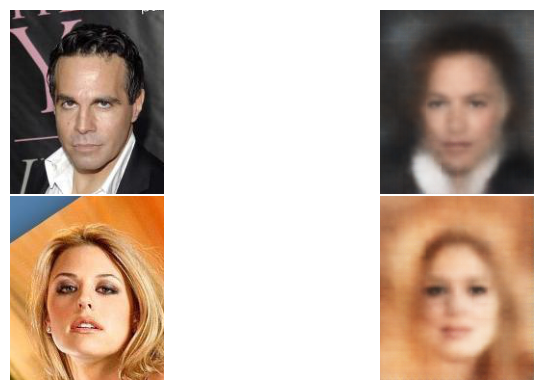

In [27]:
attrs = plot_model_reconstructions(model,image1,image2)

In [28]:
columns = ['Male','Young','Bald','Mustache','Pale_Skin','No_Beard','Receding_Hairline']
df1 = pd.DataFrame([attrs[0].flatten()], columns = columns).applymap(lambda x: 1 if x > 0.5 else 0)
df2 = pd.DataFrame([attrs[1].flatten()], columns = columns).applymap(lambda x: 1 if x > 0.5 else 0)
display(df1)
display(df2)

C:\Users\Nate\AppData\Local\Temp\ipykernel_42600\1505859866.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df1 = pd.DataFrame([attrs[0].flatten()], columns = columns).applymap(lambda x: 1 if x > 0.5 else 0)
C:\Users\Nate\AppData\Local\Temp\ipykernel_42600\1505859866.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df2 = pd.DataFrame([attrs[1].flatten()], columns = columns).applymap(lambda x: 1 if x > 0.5 else 0)


Male  Young  Bald  Mustache  Pale_Skin  No_Beard  Receding_Hairline
0     1      1     0         0          0         1                  0

Male  Young  Bald  Mustache  Pale_Skin  No_Beard  Receding_Hairline
0     0      1     0         0          0         1                  0

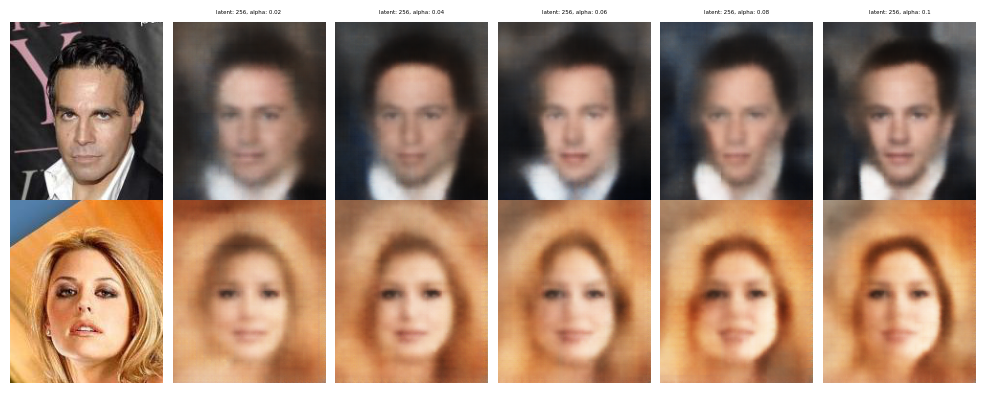

In [29]:
plot_images_from_models('models/sum_male_young_bald',alphas, latent_dim, 'sum', cropped_image1, cropped_image2, device, 2)

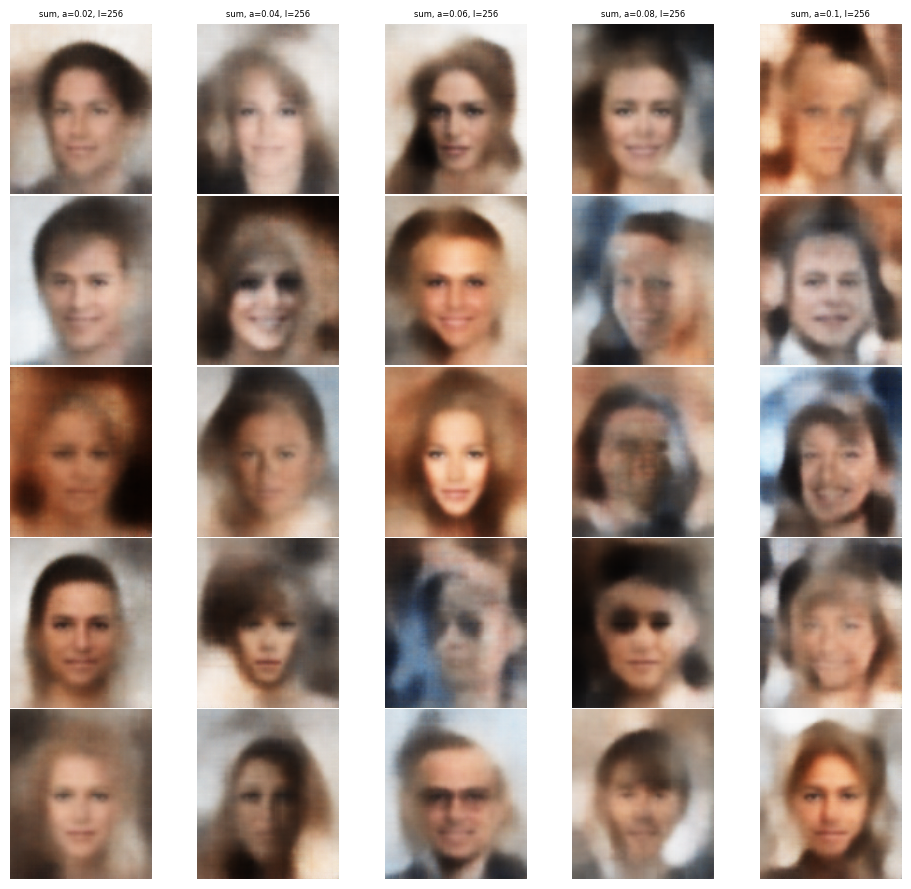

In [30]:
plot_generated_images('models/sum_male_young_bald',alphas, latent_dim, 'sum', 5, device, 2)

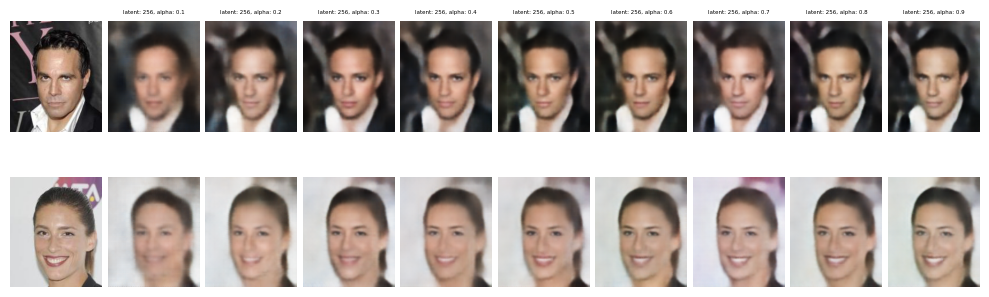

In [8]:
alphas = [0.1, 0.2, 0.3, 0.4,0.5,0.6,0.7,0.8, 0.9]
plot_images_from_models('models/sum_models',alphas, latent_dim, 'sum', cropped_image1, cropped_image2, device, 2)

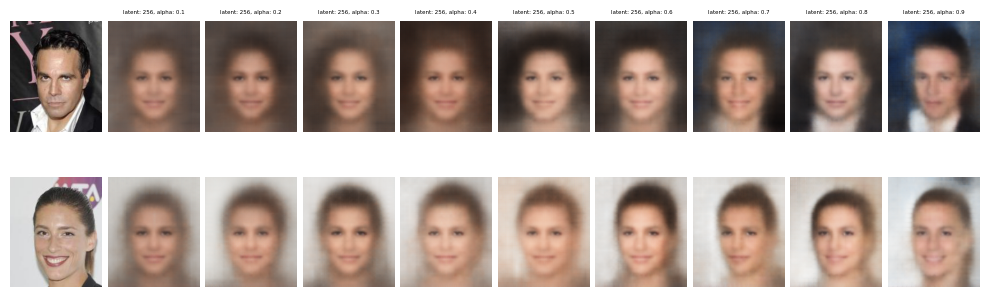

In [9]:
alphas = [0.1, 0.2, 0.3, 0.4,0.5,0.6,0.7,0.8, 0.9]
plot_images_from_models('models',alphas, latent_dim, 'mean', cropped_image1, cropped_image2, device, 2)

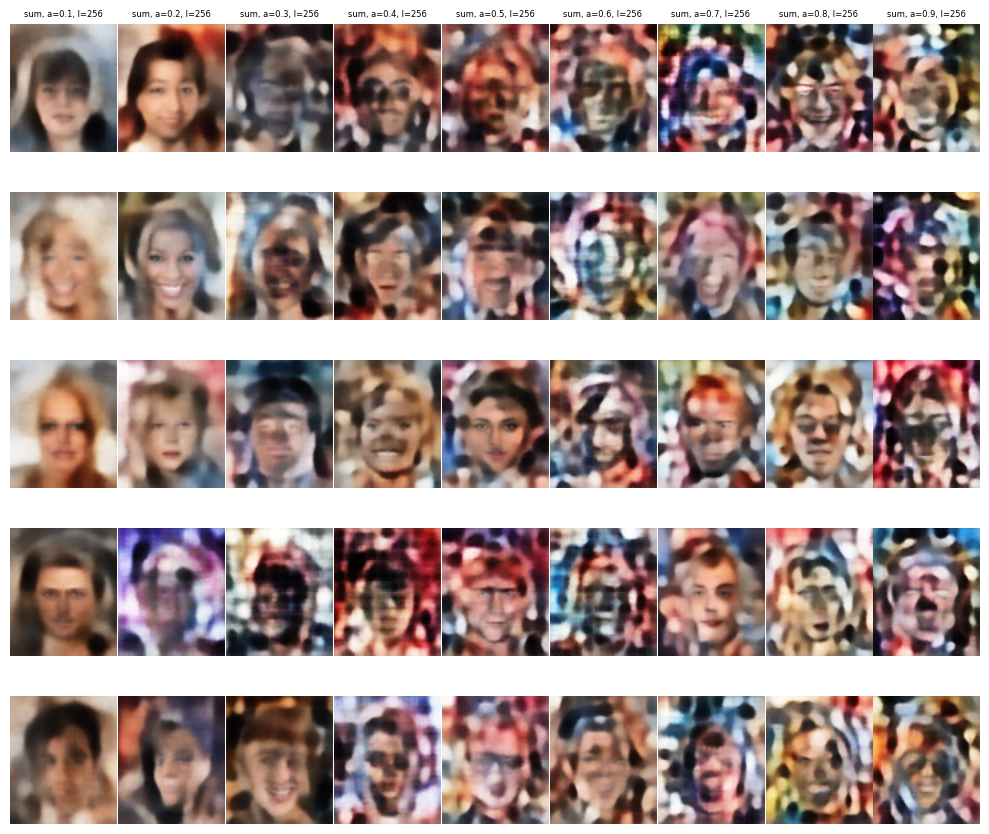

In [10]:
plot_generated_images('models/sum_models',alphas, latent_dim, 'sum', 5, device, 2)

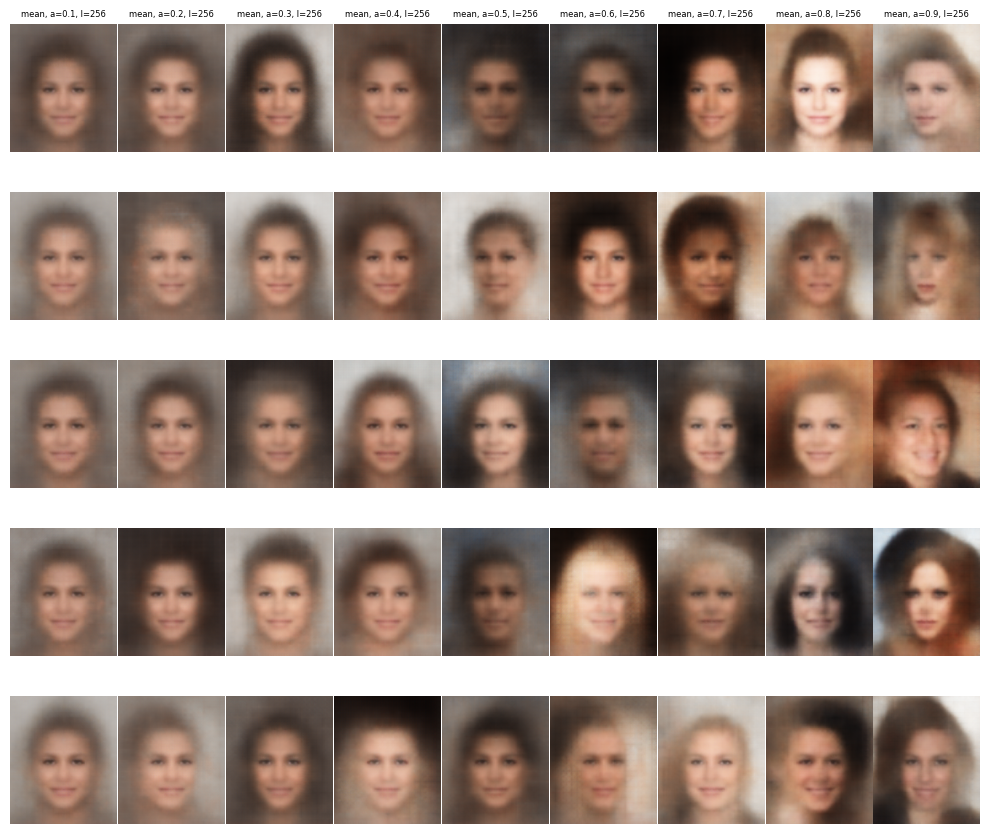

In [11]:
plot_generated_images('models',alphas, latent_dim, 'mean', 5, device, 1)

In [ ]:
#model = torch.load('cnn_vae_model_corrected.pth')
model = torch.load('cnn_vae_model_sumloss_1024latent_035_065.pth')
#model = torch.load('cnn_vae_model_sumloss.pth')

In [ ]:
num_samples = 20
z = torch.randn(num_samples, 1024)
z = z.to(next(model.parameters()).device)
with torch.no_grad():
    generated_data = model.decoder(z)
display(to_image(generated_data[0]))
display(to_image(generated_data[1]))
display(to_image(generated_data[2]))
display(to_image(generated_data[3]))
display(to_image(generated_data[4]))
display(to_image(generated_data[5]))
display(to_image(generated_data[6]))
display(to_image(generated_data[7]))
display(to_image(generated_data[8]))
display(to_image(generated_data[9]))